In this assignment we implement a Deep Neural Network
Implement from scratch (hence not using NN libraries such as tensorflow,
keras, pytorch) a Neural Network that is able to approximate a function of
two variables f(x, y).\
The network will have at least two hidden layers and it
is trained using the backpropagation algorithm.\
The test case we consider is f(x, y) = x · y (we can say that we teach the network to multiply two numbers).\
As training data for the algorithm construct a matrix of input output triplets
of the function f(x, y) = x · y.\
When x, y ∈ [0, 1] the matrix would contain training triplets of the form [xi
, yj , xi· yj ], where xi and yj are random values in [0, 1].\
Try different activation functions and find out which one performs best with your network.\
For validation accuracy calculate the root mean square error.\
Add visualization of the RMSE over training epochs, and perform simple
tests to check accuracy.

\begin{equation}
\text{standard form}\\
o_h=\sum_{l=1}^{10}w_l^4\phi\left(\sum_{k-1}^{10}w_{lk}^3\phi\left(\sum_{j=1}^{10}w_{jk}^2\phi\left(\sum_{i=1}^2w_{ji}^1x_{hi}+b_j^1\right)+b_k^2\right)b_l^3\right)+c\\
=======================================\\
\text{vector form}\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left(W^1x_h+B^1\right)+B^2\right)+B^3\right)+c\\
=======================================\\
W^1\rightarrow 10\times2\\
W^2\rightarrow 10\times10\\
W^3\rightarrow 10\times10\\
W^4\rightarrow 1\times10\\
x_h\rightarrow 2\times1\\
B^1\rightarrow 10\times1\\
B^2\rightarrow 10\times1\\
B^3\rightarrow 10\times1\\
c\rightarrow \text{scalar}\\
o_h\rightarrow \text{scalar}\\
=======================================\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left((10\times2)(2\times1)+(10\times1)\right)+B^2\right)+B^3\right)+c\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left(10\times1\right)+B^2\right)+B^3\right)+c\\
o_h=W^4\phi\left(W^3\phi\left((10\times10)\left(10\times1\right)+(10\times1)\right)+B^3\right)+c\\
o_h=W^4\phi\left((10\times10)\left(10\times1\right)+(10\times1)\right)+c\\
o_h=(1\times10)\left(10\times1\right)+c\\
o_h=\text{scalar}+\text{scalar}\\
\end{equation}

In [91]:
# initialize the weights
import numpy as np
W1 = np.random.randn(10,2) * np.sqrt(1/2) # 10x2
W2 = np.random.randn(10,10) * np.sqrt(1/10) # 10x10
W3 = np.random.randn(10,10) * np.sqrt(1/10) # 10x10
W4 = np.random.randn(1,10) * np.sqrt(1/10) # 1x10

In [92]:
#initialize the biases
import numpy as np
b1 = np.zeros((10,1)) # 10x1
b2 = np.zeros((10,1)) # 10x1
b3 = np.zeros((10,1)) # 10x1
c = 0 # scalar

In [93]:
# activations
import numpy as np
def htan(x):
  return np.tanh(x)

# predictions and recordings
def predict_and_record(x):
  preA1 = (W1@x) + b1 # calculate pre-activations for layer 1
  A1 = htan(preA1) # calculate activations for layer 1
  preA2 = (W2@A1) + b2 # calculate pre-activations for layer 2
  A2 = htan(preA2) # calculate activations for layer 2
  preA3 = (W3@A2) + b3 # calculate pre-activations for layer 3
  A3 = htan(preA3) # calculate activations for layer 3

  # pre-activation values for the output layer will also be the activation values
  # because we are using a linear activation function for the output layer
  O = (W4@A3) + c # scalar

  #return W4@htan( W3@htan( W2@htan( W1@x +b1 ) +b2 ) +b3 ) +c
  return preA1, A1, preA2, A2, preA3, A3, O

In [94]:
# build the data
import numpy as np
def create_data(n_observations):
    train_data = np.random.rand(2*n_observations).reshape((n_observations, 2))
    label_data = train_data[:,0] * train_data[:,1]
    return train_data, label_data


In [95]:
# visualize the data
training_size = 10000
X, y = create_data(training_size)

print(X)
print(y)

[[0.33986346 0.46417885]
 [0.0201877  0.57589608]
 [0.48239535 0.59387287]
 ...
 [0.91619269 0.50593147]
 [0.50751874 0.31643538]
 [0.84010736 0.59521287]]
[0.15775743 0.01162602 0.28648151 ... 0.46353072 0.16059688 0.50004271]


In [96]:
# train the network
import numpy as np
def htan_prime(x):
  return 1 - np.tanh(x)**2

mu = 0.05
def single_backPropagation(x, W1, W2, W3, W4, b1, b2, b3, c, z1, a1, z2, a2, z3, a3, o, y):
  # calculate the gradient of the loss with respect to the pre-activations of each layer
  output_gradient = o-y # scalar
  layer3_gradient = (W4.T * output_gradient) * htan_prime(o) # 10x1
  layer2_gradient = (W3.T @ layer3_gradient) * htan_prime(z3) # 10x1
  layer1_gradient = (W2.T @ layer2_gradient) * htan_prime(z2) # 10x1

  # gradient of right layer, pre-activations of right layer, activations of previous layer
  loss_W4 = output_gradient * htan_prime(o) * a3 # 10x1
  loss_c = output_gradient * htan_prime(o) # 10x1
  W4 -= (mu * loss_W4).T
  c -= (mu * loss_c)
  # update (W3) with EW3 and (B3) with Eb3
  loss_W3 = layer3_gradient * htan_prime(z3) @ a2.T # 10x10
  loss_b3 = layer3_gradient * htan_prime(z3) # 10x1
  W3 -= (mu * loss_W3)
  b3 -= (mu * loss_b3)
  # update (W2) with EW2 and (B2) with Eb2
  loss_W2 = layer2_gradient * htan_prime(z2) @ a1.T # 10x10
  loss_b2 = layer2_gradient * htan_prime(z2) # 10x1
  W2 -= (mu * loss_W2)
  b2 -= (mu * loss_b2)
  # update (W1) with EW1 and (B1) with Eb1
  loss_W1 = layer1_gradient * htan_prime(z1) @ x.T # 10x2
  loss_b1 = layer1_gradient * htan_prime(z1) # 10x1
  W1 -= (mu * loss_W1)
  b1 -= (mu * loss_b1)

# how are we applying gradient descent and back propogation?
def train():
  for i in range(training_size):
    # forward pass
    z1, a1, z2, a2, z3, a3, o = predict_and_record(X[i,:].reshape(-1,1))
    # back propagation
    single_backPropagation(X[i,:].reshape(-1,1), W1, W2, W3, W4, b1, b2, b3, c, z1, a1, z2, a2, z3, a3, o, y[i])

In [97]:
# @title
# print the weights and biases to see change
print("W1: ", W1)
print("b1: ", b1)
print("W2: ", W2)
print("b2: ", b2)
print("W3: ", W3)
print("b3: ", b3)
print("W4: ", W4)
print("c: ", c)


W1:  [[ 1.04096789  0.45968497]
 [ 0.69806105  0.21707419]
 [-1.25805588  0.09731878]
 [ 0.80165757  1.07889957]
 [ 0.73177751 -0.06496738]
 [-0.83933047 -1.42634447]
 [-0.0870639  -0.71708106]
 [ 0.54906307  0.88715608]
 [ 1.28354433 -0.17699313]
 [ 0.04656035  0.99321451]]
b1:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2:  [[-0.15183686  0.14950787  0.0404113  -0.26373847 -0.38696064  0.43275413
  -0.01178967  0.52048215  0.46829492 -0.0520653 ]
 [-0.1684602  -0.33882043 -0.61653139 -0.24426648 -0.12519097 -0.05719045
  -0.45557728 -0.13504872  0.29034067  0.2473426 ]
 [-0.31808923 -0.60357967  0.27089335  0.41676166  0.42446324  0.41559557
  -0.20583192  0.12565052 -0.12205477 -0.16080931]
 [-0.46479635  0.13165539 -0.5089999   0.1871843   0.36867155  0.01470261
   0.44803722  0.31691338  0.41803498  0.47854419]
 [ 0.26903248 -0.60940037  0.25770376  0.44883877 -0.36118502  0.1417649
  -0.19824854 -0.19631726 -0.03061704 -0.05782087]
 [ 0.20207381 -0.28904776 -0.

In [98]:
# test the network
import numpy as np

# build testing data
test_size = 100
test_data, test_results = create_data(test_size)

RMSE = np.zeros((20,2))
for i in range(20):
  # train the network over all inputs with SGD
  train()

  # print out RMSE
  summed_error = 0.0
  for j in range(test_size):
    z1, a1, z2, a2, z3, a3, o = predict_and_record(test_data[j,:])
    summed_error += (o[0][0] - test_results[j])**2
  RMSE[i][1] = i
  RMSE[i][0] = np.sqrt(summed_error/test_size)
  print("RMSE[", i, "]: ", RMSE[i][0])

RMSE[ 0 ]:  0.16074817212311335
RMSE[ 1 ]:  0.15990621130995858
RMSE[ 2 ]:  0.15787465175547719
RMSE[ 3 ]:  0.15684661614718834
RMSE[ 4 ]:  0.15653709804135152
RMSE[ 5 ]:  0.15671556899777292
RMSE[ 6 ]:  0.15723194053789483
RMSE[ 7 ]:  0.15798894049872939
RMSE[ 8 ]:  0.1589278993810727
RMSE[ 9 ]:  0.16002114074725712
RMSE[ 10 ]:  0.16126631582656006
RMSE[ 11 ]:  0.1626807813854886
RMSE[ 12 ]:  0.16429576983181676
RMSE[ 13 ]:  0.16615072252362545
RMSE[ 14 ]:  0.16828817960294615
RMSE[ 15 ]:  0.17074946014496759
RMSE[ 16 ]:  0.17357122801117722
RMSE[ 17 ]:  0.1767829570201261
RMSE[ 18 ]:  0.18040525948009414
RMSE[ 19 ]:  0.18444900336129963


In [99]:
test = np.array([[0.5],[0.5]])                            # (0.5 * 0.5) = 0.25
z1, a1, z2, a2, z3, a3, o = predict_and_record(test)
print(o)

[[0.24417996]]


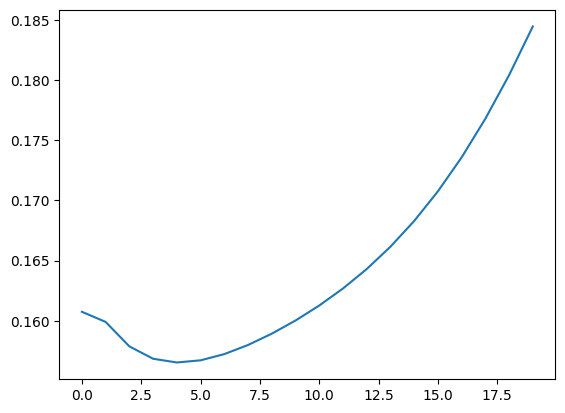

In [100]:
# visualize the test results

import matplotlib.pyplot as plt
plt.plot(RMSE[:,1],RMSE[:,0])
plt.show()